In [6]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt

Let's import the data. `geopandas.GeoDataFrame` can have as many `geopandas.GeoSeries` objects within, but only one is active at a time.

In [29]:
nil = geopandas.read_file("../data/milan/milan_nil.geojson")
municipi = geopandas.read_file("../data/milan/milan_municipi.geojson")

bikemi_stalls = geopandas.read_file("../data/bikemi_metadata/bikemi_stalls.geojson")

And load the data:

In [31]:
station_outflow = pd.read_csv("../data/bikemi_csv/station_daily_outflow.csv", parse_dates=[0], index_col=[0])\
    .fillna(0).astype("int64")

station_outflow.head()

,Accursio - Portello,Adamello - Lorenzini,Alserio - Cola Montano,Amendola M1,Angilberto - Comacchio,Aquileia,Arcimboldi - Innovazione,Arcivescovado,Arco della Pace 1 - Bertani,Arco della Pace 2 - Pagano,...,Verrocchio - Juvara,Vesuvio - Lipari,Vigliani - Scarampo,Villapizzone FFSS - Lambruschini,Vittor Pisani,XXII Marzo,XXIV Maggio,XXV Aprile,Zara M3,Zavattari - Tempesta
giorno_partenza,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2,1,7,2,2,1,3,10,4,6,...,2,0,0,1,6,1,3,14,0,2
2019-01-02,10,7,13,8,2,4,7,29,22,14,...,12,4,2,2,19,7,11,39,3,2
2019-01-03,13,5,9,13,2,8,6,26,15,21,...,15,14,4,3,32,6,14,30,7,5
2019-01-04,10,8,15,13,2,6,1,19,21,23,...,9,13,1,1,29,11,15,45,8,3
2019-01-05,14,4,5,8,1,14,2,22,19,20,...,10,11,1,3,14,8,12,29,6,2


We have geometries. Let's make a first plot, to see how it looks like.

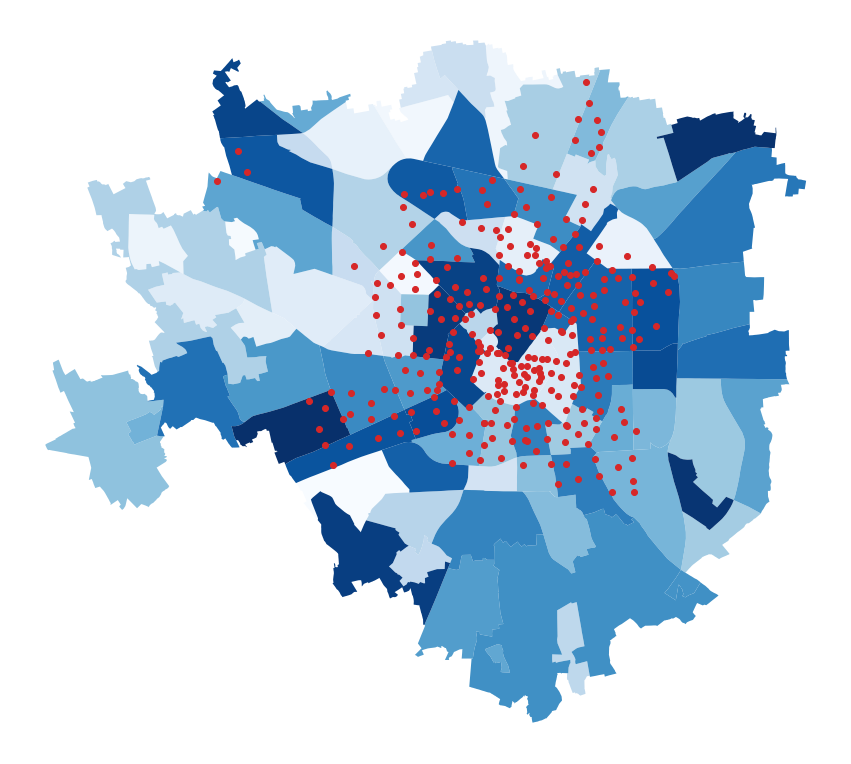

In [19]:
fig, ax = plt.subplots(figsize = (15,15))

nil.plot(ax = ax, cmap = "Blues")
bikemi_stalls.plot(ax = ax, color = "tab:red")

plt.axis("off")

plt.show()

We want to join `station_outflow` on the station name to `nil`. For doing this, we need to `pivot_longer` the dataset -- using some R jargon.

In [32]:
bikemi_stalls.head()

,id_amat,stato,numero,nome,tipo,stalli,sede,id_via,indirizzo,civico,zd_attuale,anno,geometry
0,1,attiva,001,Duomo,Monofacciale,24,Carreggiata,1.0,PIAZZA DEL DUOMO,None,1,2008.0,POINT (9.18914 45.46475)
1,3,attiva,402,San Babila Bis,Monofacciale,24,Marciapiede,216.0,PIAZZA SAN BABILA,None,1,2008.0,POINT (9.19725 45.46627)
2,4,attiva,003,Cadorna 1,Monofacciale,21,Marciapiede,601.0,PIAZZALE LUIGI CADORNA,None,1,2008.0,POINT (9.17566 45.46800)
3,5,attiva,004,Lanza,Monofacciale,24,Marciapiede,726.0,LARGO ANTONIO GREPPI,None,1,2008.0,POINT (9.18197 45.47227)
4,6,attiva,005,Universita' Cattolica,Monofacciale,24,Marciapiede,643.0,PIAZZA SANT'AMBROGIO,None,1,2008.0,POINT (9.17641 45.46312)


In [37]:
station_outflow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Columns: 306 entries, Accursio - Portello to Zavattari - Tempesta
dtypes: int64(306)
memory usage: 875.4 KB


In [38]:
pd.wide_to_long(station_outflow, )

SyntaxError: invalid syntax (Temp/ipykernel_16472/3124482780.py, line 1)